# LOCAL EARTHQUAKE AND NOISE DATABASE(LEN-DB)

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Dropout
from keras.models import Model

<b>Read the hdf5 file:</b>

In [2]:
file_path = r"C:\Users\Abhishek\Desktop\LEN-DB-master\LEN-DB-master\LEN-DB.hdf5"


In [3]:
lenDB = h5py.File(file_path, 'r')

<b> Print the group names in the file </b> 

In [4]:
for key in lenDB.keys():
    print(key)

AN
EQ
Stations


# EARTHQUAKE

In [4]:
earthquakes = list(lenDB['EQ'].keys())
print('Number of earthquakes: ', len(earthquakes))
print('Examples of earthquake keys: ', earthquakes[:5])

Number of earthquakes:  629095
Examples of earthquake keys:  ['AE_319A_1354213304.0999', 'AE_319A_1355252254.425', 'AE_319A_1360263749.5500002', 'AE_319A_1362597107.2', 'AE_319A_1363632861.6499999']


In [6]:
eq = lenDB['EQ'][earthquakes[1000]]
eq[0,:]

array([ 4.11026025e-08,  3.55794129e-08,  4.40558838e-08,  4.04422093e-08,
        5.00501057e-08,  5.52737092e-08,  6.03513940e-08,  7.14441901e-08,
        9.80861357e-08,  9.81725743e-08,  1.01023868e-07,  1.07581473e-07,
        1.09898992e-07,  1.81002249e-07,  1.39167744e-07,  8.65174037e-08,
        1.48476129e-07,  1.58633121e-07,  6.93013432e-08,  1.19115676e-07,
        1.32224174e-07,  4.52715840e-08,  4.99787363e-08,  1.19937931e-07,
        7.29443175e-08, -1.72225754e-08, -6.79566193e-11,  5.08514709e-08,
        8.75538370e-08, -4.26903166e-09, -7.36529123e-08, -6.06692730e-08,
        1.21138587e-09, -1.82483279e-09, -1.51137537e-07, -1.94612321e-07,
       -4.91858126e-08, -2.84749049e-08, -2.26674854e-07, -2.48276879e-07,
       -1.67230523e-07, -2.74992387e-07, -2.86744337e-07, -2.32551828e-07,
       -3.13008381e-07, -3.61727633e-07, -3.62316491e-07, -4.03373777e-07,
       -4.04205473e-07, -3.30389165e-07, -3.13047940e-07, -4.93639734e-07,
       -5.05587633e-07, -

#### Earthquake having mag > 7

In [5]:
bigEarthquakes = [eq for eq in earthquakes if lenDB['EQ'][eq].attrs['mag'] > 7]

#### Earthquake having mag <= 3

In [7]:
import random

lowEarthquakes = random.sample([eq for eq in earthquakes if 0 <= lenDB['EQ'][eq].attrs['mag'] <= 3], 30000)


#### Earthquake having mag >=3 && mag <=7

In [8]:
import random

midEarthquakes = random.sample([eq for eq in earthquakes if 3 <= lenDB['EQ'][eq].attrs['mag'] <= 7], 70000)


In [10]:
import numpy as np

earthquake_arrays = []
for eq_key in midEarthquakes:
    eq_data = lenDB['EQ'][eq_key]
    eq_array = np.array(eq_data)  # Convert the dataset to a NumPy array
    earthquake_arrays.append(eq_array)

merged_array = np.stack(earthquake_arrays, axis=0)
np.save('mid_earthquake_data.npy', merged_array)


In [11]:
merged_array.shape

(70000, 3, 540)

In [12]:
import numpy as np

earthquake_arrays = []
for eq_key in lowEarthquakes:
    eq_data = lenDB['EQ'][eq_key]
    eq_array = np.array(eq_data)  # Convert the dataset to a NumPy array
    earthquake_arrays.append(eq_array)

merged_array = np.stack(earthquake_arrays, axis=0)
np.save('low_earthquake_data.npy', merged_array)


In [13]:
merged_array.shape

(30000, 3, 540)

In [14]:
import numpy as np

earthquake_arrays = []       
for eq_key in bigEarthquakes:
    eq_data = lenDB['EQ'][eq_key]
    eq_array = np.array(eq_data)  # Convert the dataset to a NumPy array
    earthquake_arrays.append(eq_array)

merged_array = np.stack(earthquake_arrays, axis=0)
np.save('big_earthquake_data.npy', merged_array)

In [15]:
merged_array.shape

(10, 3, 540)

In [16]:
import numpy as np

# Load data from the three separate files
low_quakes = np.load('low_earthquake_data.npy')
mid_quakes = np.load('mid_earthquake_data.npy')
big_quakes = np.load('big_earthquake_data.npy')

# Concatenate the arrays along the appropriate axis (e.g., axis=0 for stacking vertically)
combined_quakes = np.concatenate((low_quakes, mid_quakes, big_quakes), axis=0)

# Save the combined data into a new file
np.save('earthquake.npy', combined_quakes)


In [17]:
combined_quakes.shape

(100010, 3, 540)

# NOISE

In [6]:
noise = list(lenDB['AN'].keys())
print('Number of noise waveforms: ', len(noise))
print('Examples of noise keys: ', noise[:5])

Number of noise waveforms:  615847
Examples of noise keys:  ['AE_113A_1334887512.5249999', 'AE_113A_1336639948.775', 'AE_113A_1337258057.2749', 'AE_113A_1337763598.2', 'AE_113A_1338669957.3500001']


In [19]:
import random
random_noise_keys = random.sample(noise, 100010)

In [20]:
import numpy as np

noise_arrays = []
for eq_key in random_noise_keys:
    eq_data = lenDB['AN'][eq_key]
    eq_array = np.array(eq_data)  # Convert the dataset to a NumPy array
    noise_arrays.append(eq_array)

merged_array = np.stack(noise_arrays, axis=0)
np.save('noise_data.npy', merged_array)

In [21]:
merged_array.shape

(100010, 3, 540)

In [22]:
import numpy as np

# Load the earthquake and noise data
earthquake_data = np.load('earthquake.npy')
noise_data = np.load('noise_data.npy')

# Verify the shapes of the arrays
assert earthquake_data.shape[0] == noise_data.shape[0], "Number of earthquakes and noise samples should be the same"

# Add noise to each earthquake data
noisy_earthquake_data = earthquake_data + noise_data

# Save the combined data to a new file
np.save('noisy_earthquake_data.npy', noisy_earthquake_data)


In [23]:
noisy_earthquake_data.shape

(100010, 3, 540)

In [24]:
noisy_earthquake_data[5][:]

array([[-8.34437209e-08, -8.41912140e-08, -8.59976362e-08, ...,
        -3.37304363e-08, -2.90604979e-08, -2.90707818e-08],
       [ 1.26707625e-07,  1.26680783e-07,  1.28778014e-07, ...,
        -4.92307172e-08, -4.09483892e-08, -3.82259464e-08],
       [-7.95444045e-08, -8.06453135e-08, -8.35417096e-08, ...,
         4.56253227e-08,  4.07513129e-08,  3.75349012e-08]])

In [25]:
earthquake_data[5][:]

array([[-6.85803697e-08, -6.97978370e-08, -7.21666050e-08, ...,
        -1.54595560e-08, -1.48352091e-08, -1.42070979e-08],
       [ 7.11208713e-08,  7.06937510e-08,  7.10301755e-08, ...,
        -2.39812629e-08, -1.94250660e-08, -1.69462755e-08],
       [-1.68098254e-08, -1.70976057e-08, -1.80125281e-08, ...,
         3.70940783e-08,  3.52611931e-08,  3.45153436e-08]])

In [26]:
noise_data[5][:]

array([[-1.48633512e-08, -1.43933770e-08, -1.38310312e-08, ...,
        -1.82708803e-08, -1.42252888e-08, -1.48636839e-08],
       [ 5.55867535e-08,  5.59870322e-08,  5.77478387e-08, ...,
        -2.52494543e-08, -2.15233232e-08, -2.12796708e-08],
       [-6.27345791e-08, -6.35477078e-08, -6.55291815e-08, ...,
         8.53124437e-09,  5.49011985e-09,  3.01955761e-09]])

In [27]:
e = lenDB['AN'][random_noise_keys[5]]

In [28]:
e[:]

array([[-1.48633512e-08, -1.43933770e-08, -1.38310312e-08, ...,
        -1.82708803e-08, -1.42252888e-08, -1.48636839e-08],
       [ 5.55867535e-08,  5.59870322e-08,  5.77478387e-08, ...,
        -2.52494543e-08, -2.15233232e-08, -2.12796708e-08],
       [-6.27345791e-08, -6.35477078e-08, -6.55291815e-08, ...,
         8.53124437e-09,  5.49011985e-09,  3.01955761e-09]])

In [29]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

In [30]:
dataNoise = noisy_earthquake_data
dataNoise1 = earthquake_data

### Supervised Training 

In [74]:

from keras.layers import Input, Dense, Dropout, concatenate, UpSampling1D, Flatten, MaxPooling1D, BatchNormalization, average, Conv2D
from keras.models import Model
import scipy.io
from keras import optimizers
from keras import backend as K
from tensorflow.python.keras import backend as KK
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization   
# from keras.layers.normalization import BatchNormalization
from keras import regularizers

#import theano
#import theano.tensor as T
import tensorflow as tf
import numbers
from tensorflow.python.framework import ops
from tensorflow.python.ops import standard_ops
from math import*
#import theano.tensor as T

import numpy as np
import matplotlib.pyplot as plt

#corr1=0.03
#corr2=0.98
#corr3=0.87

#corr1=0.015
#corr2=0.790
#corr3=0.620


corr1=0
corr2=1
corr3=1
win = 256

# #mat = scipy.io.loadmat ('Synthetic_data.mat')
# #dataNoise = input_data
# dataNoise = np.transpose(dataNoise)
# dataNoise = np.reshape(dataNoise,(256,int(np.shape(dataNoise)[0]*np.shape(dataNoise)[1]/win )))
# dataNoise = np.transpose(dataNoise)
# dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
dataNoise = dataNoise.reshape(-1,3,540,1)

# #dataNoise1= target_lables
# dataNoise1 = np.transpose(dataNoise1)
# dataNoise1 = np.reshape(dataNoise1,(256,int(np.shape(dataNoise1)[0]*np.shape(dataNoise1)[1]/256 )))
# dataNoise1 = np.transpose(dataNoise1)
# dataNoise1 = np.reshape(dataNoise1, (dataNoise1.shape[0],dataNoise1.shape[1]))
dataNoise1 = dataNoise1.reshape(-1,3,540,1)

INPUT_SIZE1 = dataNoise.shape[0]
INPUT_SIZE2 = dataNoise.shape[1]
 
input_img = Input(shape=(3,540,1))


encoded1 = Conv2D(512,(3,3), activation='relu', padding='same')(input_img)
encoded2 = Conv2D(256,(3,3), activation='relu', padding = 'same')(encoded1)
encoded3 = Conv2D(128,(3,3), activation='relu', padding='same' )(encoded2)


decoded1 = Conv2D(128,(3,3), activation='relu', padding='same' )(encoded3)
decoded2 = Conv2D(256,(3,3), activation='relu', padding='same')(decoded1)
decoded3 = Conv2D(512,(3,3), activation='relu', padding='same' )(decoded2)

flatten = Flatten()(decoded3)
decoded = Dense(INPUT_SIZE2, activation='linear')(decoded3)


autoencoder = Model(input_img, decoded)
sgd = tf.keras.optimizers.Adam(lr=0.001) 
# sgd = optimizers.adam(lr=0.001)
autoencoder.compile(optimizer=sgd, loss='mse')

autoencoder.summary()


batch =64

tic()
history = autoencoder.fit(dataNoise,dataNoise1, epochs=5, batch_size=batch, shuffle=True)
toc()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3, 540, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 540, 512)       5120      
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 540, 256)       1179904   
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 540, 128)       295040    
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 540, 128)       147584    
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 540, 256)       295168    
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 540, 512)       1180

### Saving the Model

In [76]:
from keras.models import model_from_json
from keras.models import load_model

model_json = autoencoder.to_json()
with open("bestInitial_syn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("bestInitial_synW.h5")
print("Saved model to disk")

Saved model to disk


### Loading the model

In [7]:
from keras.models import model_from_json
from keras.models import load_model

# load json and create model
json_file = open('bestInitial_syn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
DDAE = model_from_json(loaded_model_json)

# load weights into new model
DDAE.load_weights("bestInitial_synW.h5")
print("Loaded model from disk")

Loaded model from disk


### Application on one of the example of LEN-DB Data

In [8]:
ex1 = lenDB['EQ'][bigEarthquakes[5]]
ex1[:]

array([[ 0.00116759,  0.00124858,  0.00121383, ..., -0.00117175,
        -0.0011902 , -0.00113856],
       [ 0.00355727,  0.00377958,  0.00363683, ...,  0.00085777,
         0.00082881,  0.0007513 ],
       [ 0.00332997,  0.00353336,  0.00339278, ...,  0.00211028,
         0.00210457,  0.00196864]])

In [9]:
nx1 = lenDB['AN'][noise[1000]]
nx1[:]

array([[ 2.01003943e-08,  1.99753042e-08,  1.98442230e-08, ...,
         1.67784611e-08,  1.70069252e-08,  1.73447519e-08],
       [ 2.85478991e-09,  4.75541664e-09,  7.19108495e-09, ...,
        -3.09065087e-08, -3.32487170e-08, -3.55716467e-08],
       [ 1.21519124e-08,  1.50525768e-08,  1.90281244e-08, ...,
         1.52808778e-08,  1.24074357e-08,  1.02978850e-08]])

In [ ]:
plt.plot(ex1[:])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
plt.plot(nx1[:])
plt.show

In [ ]:
dn1 = np.concatenate((ex1, nx1 ), axis=0)
dn1[:]

In [ ]:
plt.plot(dn1[:])
plt.show

In [12]:
ex2 = lenDB['EQ'][midEarthquakes[1000]]
ex2[:]

array([[ 2.16079168e-08,  2.21756258e-08,  2.29893711e-08, ...,
         3.50533065e-08,  3.63672634e-08,  3.45164048e-08],
       [-5.77134088e-09, -5.54351552e-09, -5.21937479e-09, ...,
         2.61640022e-08,  2.29177250e-08,  2.16510079e-08],
       [-4.31213749e-09, -4.25350380e-09, -4.27205626e-09, ...,
        -9.61017241e-10, -3.03116385e-09, -3.20635283e-09]])

<function matplotlib.pyplot.show(close=None, block=None)>

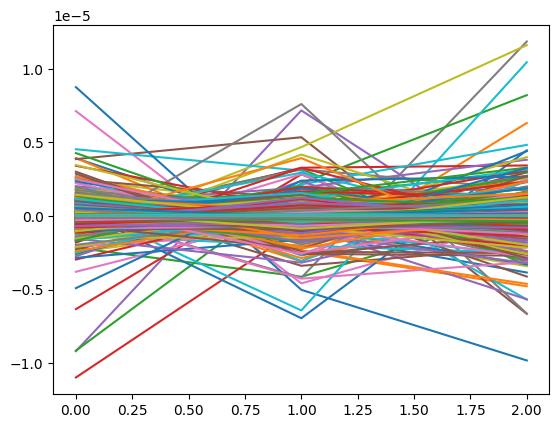

In [18]:
plt.plot(ex2[:])
plt.show

In [14]:
ex3 = lenDB['EQ'][lowEarthquakes[1000]]
ex3[:]

array([[ 5.08536799e-08,  5.55465797e-08,  6.38666100e-08, ...,
         2.42402450e-08,  2.44656008e-08,  2.01495073e-08],
       [-4.02678171e-08, -4.06137142e-08, -4.29459786e-08, ...,
         6.57959578e-08,  5.19938529e-08,  4.92259550e-08],
       [ 2.39438032e-07,  2.42703728e-07,  2.48678010e-07, ...,
        -3.99260338e-08, -3.46575804e-08, -3.20436718e-08]])

<function matplotlib.pyplot.show(close=None, block=None)>

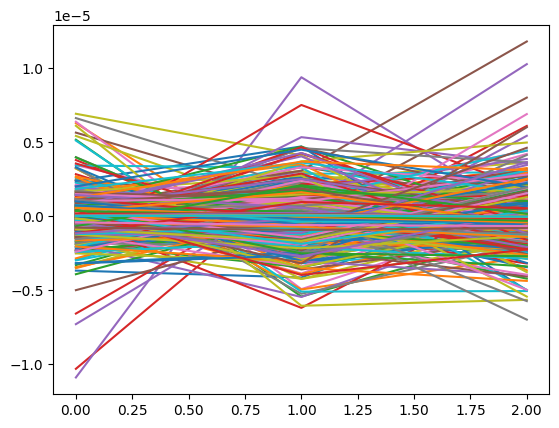

In [19]:
plt.plot(ex3[:])
plt.show

### Application on Real Earthquake Example

In [78]:
import numpy as np
from obspy import read
from scipy import signal

file_path = "C:\\Users\\Abhishek\\Desktop\\LEN-DB-master\\LEN-DB-master\\2023-05-12-mb43-shikoku-japan.miniseed"

stream = read(file_path, format='mseed')

# Find the minimum length among all traces
min_length = min(len(trace.data) for trace in stream)

# Create an empty list to store the traces
trace_data = []

# Access the individual traces in the stream, truncate or pad them, and append to the list
for trace in stream:
    trace_data.append(signal.resample(trace.data[:min_length], min_length))

# Convert the list into a 2D NumPy array
trace_array = np.stack(trace_data)

# Reshape each trace to size 3x540
reshaped_array = trace_array[:, :3*540].reshape(trace_array.shape[0], 3, 540)

# Print the shape of the reshaped array
print("Reshaped array shape:", reshaped_array.shape)


Reshaped array shape: (231, 3, 540)


### Unsupervised Training

In [79]:
from keras.layers import Input, Dense, Dropout, concatenate, UpSampling1D, Flatten, MaxPooling1D, BatchNormalization, average, Conv2D
from keras.models import Model
import scipy.io
from keras import optimizers
from keras import backend as K
from tensorflow.python.keras import backend as KK
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization   
# from keras.layers.normalization import BatchNormalization
from keras import regularizers

#import theano
#import theano.tensor as T
import tensorflow as tf
import numbers
from tensorflow.python.framework import ops
from tensorflow.python.ops import standard_ops
from math import*
#import theano.tensor as T

import numpy as np
import matplotlib.pyplot as plt



corr1=0
corr2=1
corr3=1

# mat = scipy.io.loadmat ('Real_data.mat')
#dataNoise = mat['dn1'] 
dataNoise = reshaped_array
# Reshape the input data to have 4 dimensions
dataNoise = dataNoise.reshape(-1,3,540,1)

# Print the shape of the reshaped input
#print("Reshaped input shape:", reshaped_input.shape)

# print(dataNoise.shape)
# dataNoise = np.transpose(dataNoise)
# dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
# print(dataNoise.shape)
INPUT_SIZE1 = dataNoise.shape[0]
INPUT_SIZE2 = dataNoise.shape[1]

input_img = Input(shape=(3,540,1)) 
#input_img = Input(shape=(INPUT_SIZE2,))



encoded1 = Conv2D(512,(3,3), activation='relu', padding='same')(input_img)
encoded2 = Conv2D(256,(3,3), activation='relu', padding = 'same')(encoded1)
encoded3 = Conv2D(128,(3,3), activation='relu', padding='same' )(encoded2)


decoded1 = Conv2D(128,(3,3), activation='relu', padding='same' )(encoded3)
decoded2 = Conv2D(256,(3,3), activation='relu', padding='same')(decoded1)
decoded3 = Conv2D(512,(3,3), activation='relu', padding='same' )(decoded2)

flatten = Flatten()(decoded3)
decoded = Dense(INPUT_SIZE2, activation='linear')(decoded3)




def correlation_coefficient_loss(y_true, y_pred):
    #optional
    x = y_true - y_pred
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den
    r =  corr1 -r
    
    #1
    x1 = y_true
    y1 = y_pred
    mx1 = K.mean(x1)
    my1 = K.mean(y1)
    xm1, ym1 = x1-mx1, y1-my1
    r_num1 = K.sum(tf.multiply(xm1,ym1))
    r_den1 = K.sqrt(tf.multiply(K.sum(K.square(xm1)), K.sum(K.square(ym1))))
    r1 = r_num1 / r_den1
    r1 = corr2 -  r1
    
    # Optional
    '''  
    x2 = y_true-y_pred
    y2 = y_true
    mx2 = K.mean(x2)
    my2 = K.mean(y2)
    xm2, ym2 = x2-mx2, y2-my2
    r_num2 = K.sum(tf.multiply(xm2,ym2))
    r_den2 = K.sqrt(tf.multiply(K.sum(K.square(xm2)), K.sum(K.square(ym2))))
    r2 = r_num2 / r_den2
    r2 =    corr3 - (K.maximum(K.minimum(r2, 1.0), -1.0))
    '''
    return   K.square(r1) + K.square(r)
        

                    

autoencoder = Model(input_img, decoded)
sgd = tf.keras.optimizers.Adam(lr=0.001) #I made a change here
# sgd = optimizers.adam(lr=0.001)
autoencoder.compile(optimizer=sgd, loss=[correlation_coefficient_loss])
#autoencoder.compile(optimizer=sgd, loss='mse')

autoencoder.summary()


batch =INPUT_SIZE2

# Initialization of the DDAE parameters using the parameters obtained by the synthetic example,
#in the paper we use more than one synthetich examples to obtain these parameters. However, here, 
#we just show the flow of the DDAE by using only one synthetic example. 

for i in range(2,7):
    w = DDAE.layers[i].get_weights()
    autoencoder.layers[i].set_weights(w)
    
tic()
history = autoencoder.fit(dataNoise,dataNoise, epochs=100, batch_size=batch, shuffle=True)
toc()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3, 540, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 540, 512)       5120      
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 540, 256)       1179904   
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 540, 128)       295040    
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 540, 128)       147584    
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 540, 256)       295168    
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 540, 512)       1180

C:\Users\Abhishek\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


77/77 [==============================] - 10s 120ms/step - loss: 0.3734
Epoch 2/100
77/77 [==============================] - 9s 120ms/step - loss: 0.0968
Epoch 3/100
77/77 [==============================] - 9s 119ms/step - loss: 0.1029
Epoch 4/100
77/77 [==============================] - 9s 119ms/step - loss: 0.0848
Epoch 5/100
77/77 [==============================] - 9s 119ms/step - loss: 0.0625
Epoch 6/100
77/77 [==============================] - 9s 119ms/step - loss: 0.0717
Epoch 7/100
77/77 [==============================] - 9s 121ms/step - loss: 0.1554
Epoch 8/100
77/77 [==============================] - 9s 119ms/step - loss: 0.1331
Epoch 9/100
77/77 [==============================] - 9s 119ms/step - loss: 0.0735
Epoch 10/100
77/77 [==============================] - 9s 121ms/step - loss: 0.0805
Epoch 11/100
77/77 [==============================] - 9s 119ms/step - loss: 0.0616
Epoch 12/100
77/77 [==============================] - 9s 119ms/step - loss: 0.0436
Epoch 13/100
77/77 [====

#### Noisy Input, Noise & Denoised input

In [ ]:
out = autoencoder.predict(dataNoise)

plt.imshow(np.transpose(dataNoise[0, :, :, 0]), aspect='auto')
plt.figure()
plt.imshow(np.transpose(out[0, :, :, 0]), aspect='auto')
plt.figure()
plt.imshow(np.transpose(dataNoise[0, :, :, 0] - out[0, :, :, 0]), aspect='auto')


8/8 [==============================] - 2s 239ms/step


#### Local similarity Map

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define colors
red = '#FF0000'
yellow = '#FFFF00'
green = '#00FF00'

# Create a gradient colormap
cmap = sns.color_palette([yellow, green, red], as_cmap=True)

# Create a matrix of differences
diff_matrix = np.transpose(dataNoise) - np.transpose(out) - np.transpose(out)

# Reshape the diff_matrix to 2-dimensional array
reshaped_matrix = diff_matrix.reshape(diff_matrix.shape[0], -1)

# Create a heatmap using seaborn
sns.heatmap(reshaped_matrix, cmap=cmap, center=0)

# Show the plot
plt.show()

NameError: name 'out' is not defined

<b> Remember to close the hdf5 file </b>

In [37]:
lenDB.close()
